In [1]:
import numpy as np
import gymnasium as gym
from matplotlib import pyplot as plt
from DDQN import QNet

### Initialize environment

In [2]:
env = gym.make('LunarLander-v2')

### Set hyperparameters

In [3]:
n_episodes = 1000
max_steps = 1000
replay_buffer_size=10000
replay_batch_size=32
switch_every=64
epsilon=0.05
decay=0.999
discount=0.99
burn_in=64
min_epsilon = 0.005

### Instantiate and train the model

In [4]:
model = QNet(env, replay_buffer_size, replay_batch_size, switch_every, epsilon, decay, discount, burn_in, min_epsilon)

rewards = model.train(n_episodes, max_steps, verbose=True)

burning in buffer...
Episode 000 --- reward = -739.5141666252357
Episode 025 --- reward = -188.1888875498531
Episode 050 --- reward = -191.0736901899793
Episode 075 --- reward = -249.45887536816707
Episode 100 --- reward = -72.14476851994712
Episode 125 --- reward = -75.9065433324972
Episode 150 --- reward = -82.66800247376263
Episode 175 --- reward = -14.180993773072984
Episode 200 --- reward = 31.000353716322792
Episode 225 --- reward = 168.261781845259
Episode 250 --- reward = 187.55666508466086
Episode 275 --- reward = 253.42665016846215
Episode 300 --- reward = 286.1116199729371
Episode 325 --- reward = 231.31886869681824
Episode 350 --- reward = 254.12757369746856
Episode 375 --- reward = 263.59126432055933
Episode 400 --- reward = 260.1207790861598
Episode 425 --- reward = 283.8387958750268
Episode 450 --- reward = 217.87501979278073
Episode 475 --- reward = 228.645228195457
Episode 500 --- reward = 223.8858696170921
Episode 525 --- reward = 11.698856971162726
Episode 550 --- re

### Plot training rewards

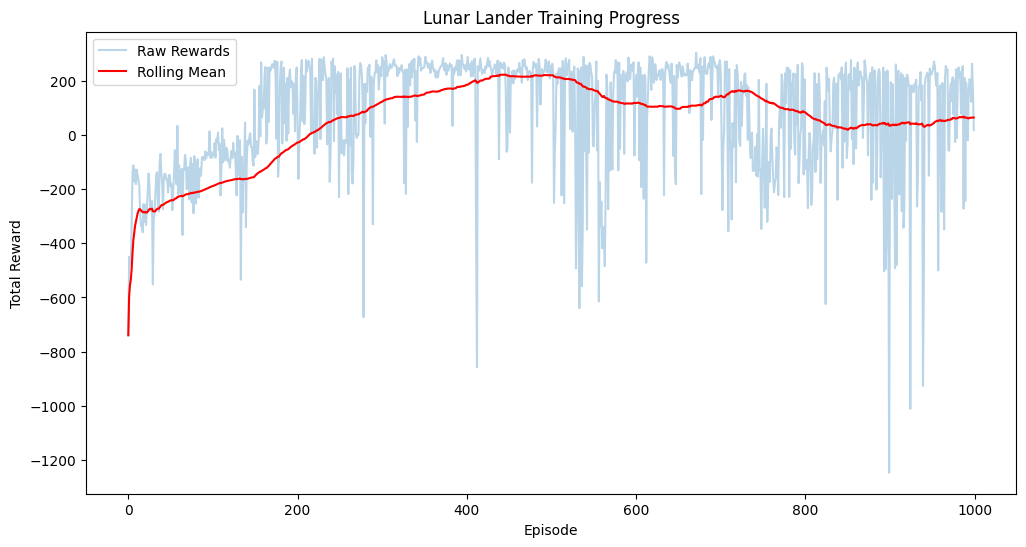

In [5]:
# Calculate rolling mean of last 100 episodes
scores = [np.mean(rewards[max(0, i-149):i+1]) for i in range(len(rewards))]
plt.figure(figsize=(12, 6))
plt.plot(rewards, alpha=0.3, label='Raw Rewards')
plt.plot(scores, color='red', label='Rolling Mean')
plt.title('Lunar Lander Training Progress')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()